# multiseq_cp_si demo

import packages

In [1]:
import numpy as np
from si4ul import multiseq_cp_si
from si4ul.si.sicore.sicore.utils import is_int_or_float
np.random.seed(1)

data generate function

In [2]:
def make_data(cp, mean, Xi=1, Sigma=1):
    d = len(cp)
    n = cp[0][-1]
    if is_int_or_float(Xi):
        Xi = Xi * np.identity(d)
    if is_int_or_float(Sigma):
        Sigma = Sigma * np.identity(n)
    mu = []
    for i in range(d):
        if len(cp[i]) - 1 != len(mean[i]):
            return None
        mu_i = [mean[i][s-1] for s in range(1, len(cp[i])) for _ in range(cp[i][s-1], cp[i][s])]
        mu += mu_i
    cov = np.kron(Xi, Sigma)
    vec_X = np.random.multivariate_normal(mu, cov)
    return vec_X.reshape(d, n)

setting and data generate

In [3]:
cp = [[0, 10, 20], [0, 10, 20], [0, 20]]
mean = [[0, 5], [0, 5], [0]]
K = 1
L = 5
X = make_data(cp, mean)

plot

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


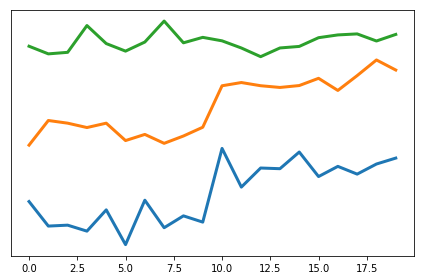

In [4]:
multiseq_cp_si.plot_multiseq(X)

computing valid p-values for change point with Double-CUSUM by Selective Inference

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.40it/s]
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


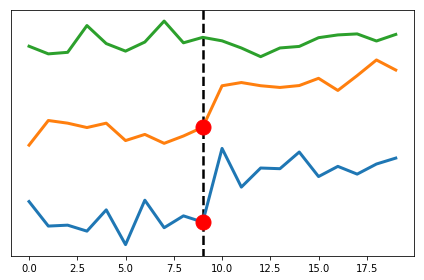

In [5]:
result = multiseq_cp_si.multiseq_cp_dc_si(X, K, L)
multiseq_cp_si.plot_multiseq_si(X, result)

computing valid p-values for change point with Double-CUSUM by over-conditioning Selective Inference

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 65.80it/s]
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


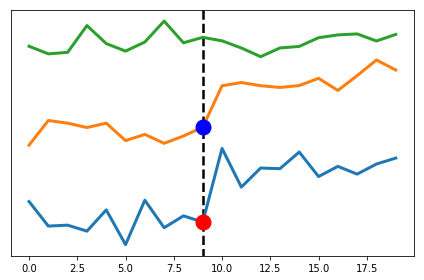

In [6]:
result = multiseq_cp_si.multiseq_cp_dc_si(X, K, L, test='oc')
multiseq_cp_si.plot_multiseq_si(X, result)

computing valid p-values for change point with scan statistic by Selective Inference

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.59it/s]
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


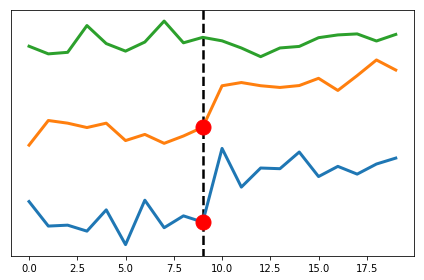

In [7]:
# si with scan
result = multiseq_cp_si.multiseq_cp_scan_si(X, K, L)
multiseq_cp_si.plot_multiseq_si(X, result)

computing valid p-values for change point with scan statistic by over-conditioning Selective Inference

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 42.37it/s]
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


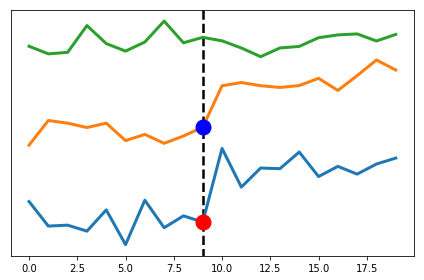

In [8]:
# si with scan oc
result = multiseq_cp_si.multiseq_cp_scan_si(X, 1, 5, test='oc')
multiseq_cp_si.plot_multiseq_si(X, result)

setting K = 2

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:59<00:00, 14.74s/it]
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


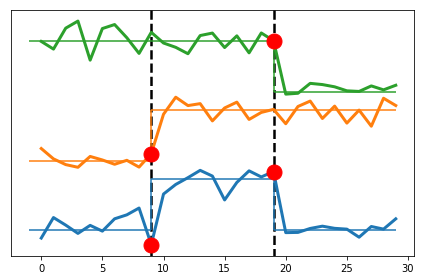

In [9]:
cp = [[0, 10, 20, 30], [0, 10, 30], [0, 20, 30]]
mean = [[0, 5, 0], [0, 5], [5, 0]]
K = 2
L = 5
X = make_data(cp, mean)
result = multiseq_cp_si.multiseq_cp_dc_si(X, K, L)
multiseq_cp_si.plot_multiseq_si(X, result, true_cp=cp, true_mean=mean)